Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   JUMLAH PENDUDUK  LUAS WILAYAH (KM)  JUMLAH RUMAH      TEMBOK  \
0              NaN                NaN           NaN         NaN   
1          89863.0             48.466       20892.0  16914.1632   
2          51589.0            148.370       10887.0   8814.1152   
3          93775.0            239.580       25805.0  20891.7280   
4          89418.0             55.000       22143.0  17926.9728   

   JUMLAH SEKOLAH\n(SMP-SMA) JUMLAH RS  Usia 15-64 (%) Kompetitor  
0                        NaN       NaN             NaN   Indihome  
1                       24.0         -       61466.292        ada  
2                       12.0         -       35286.876        ada  
3                       25.0         -       64142.100        ada  
4                       26.0         1       61161.912        ada  


<ipython-input-19-1a40e0e913bb>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Mengisi nilai NA dengan metode forward fill


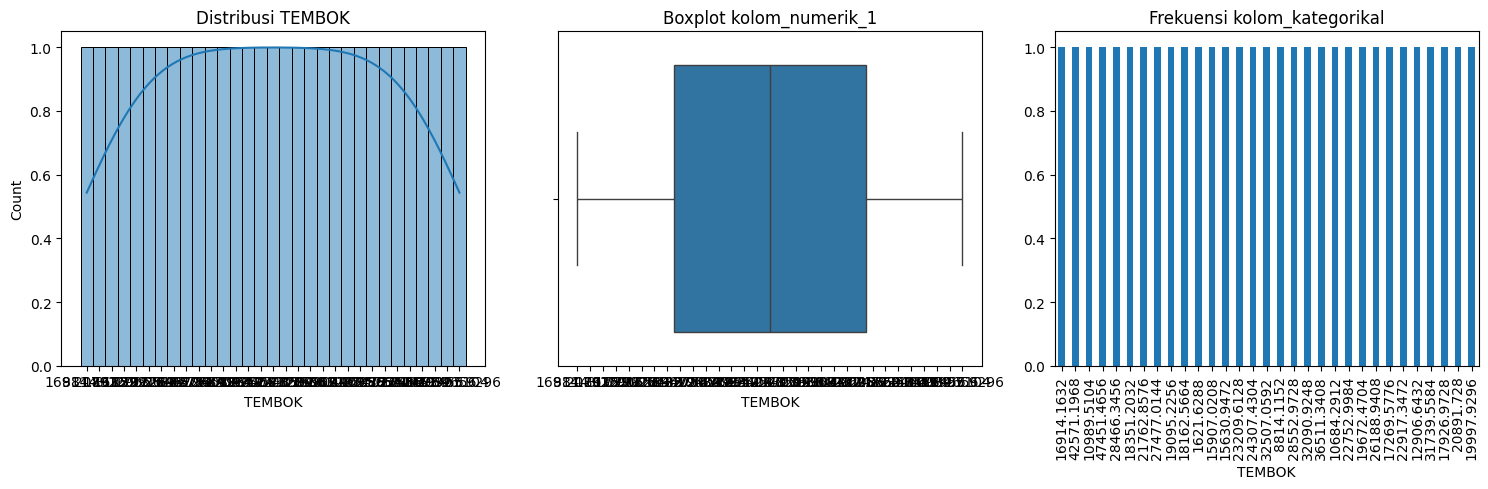

<Figure size 1500x500 with 0 Axes>

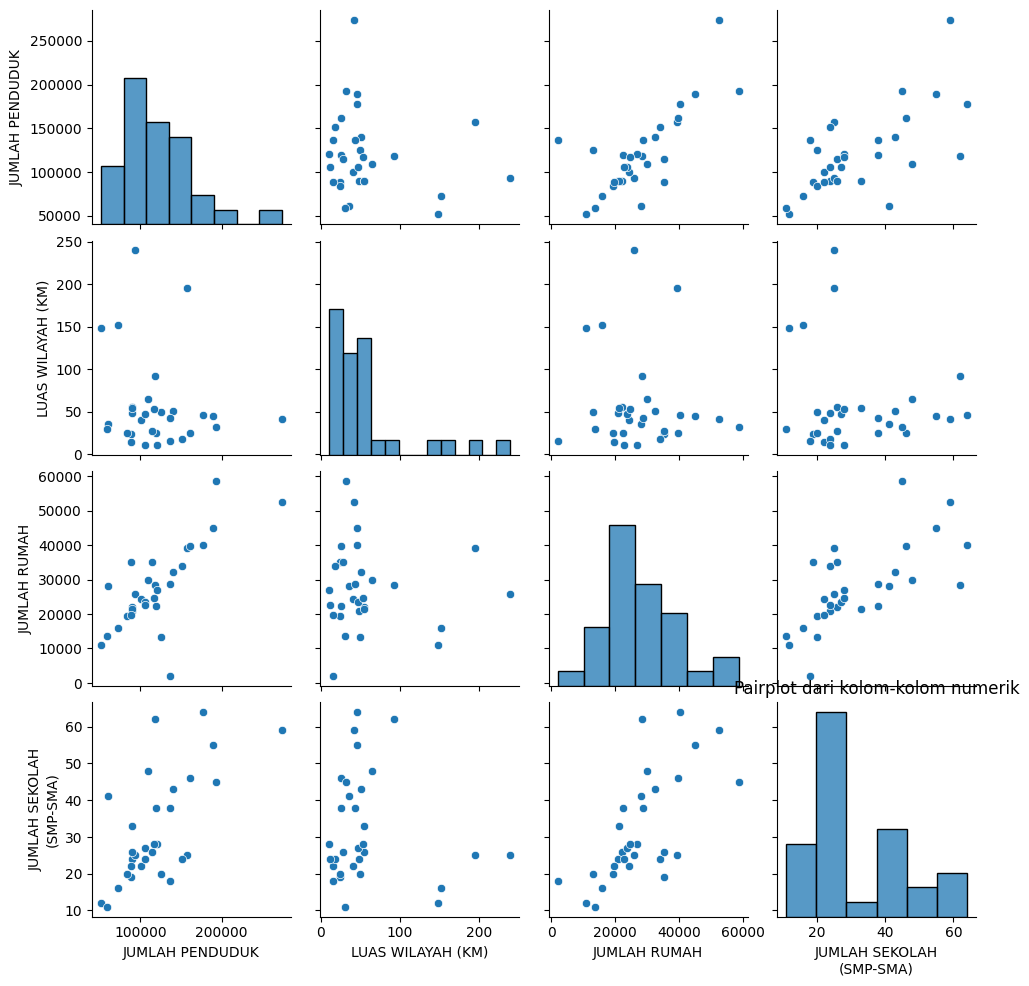

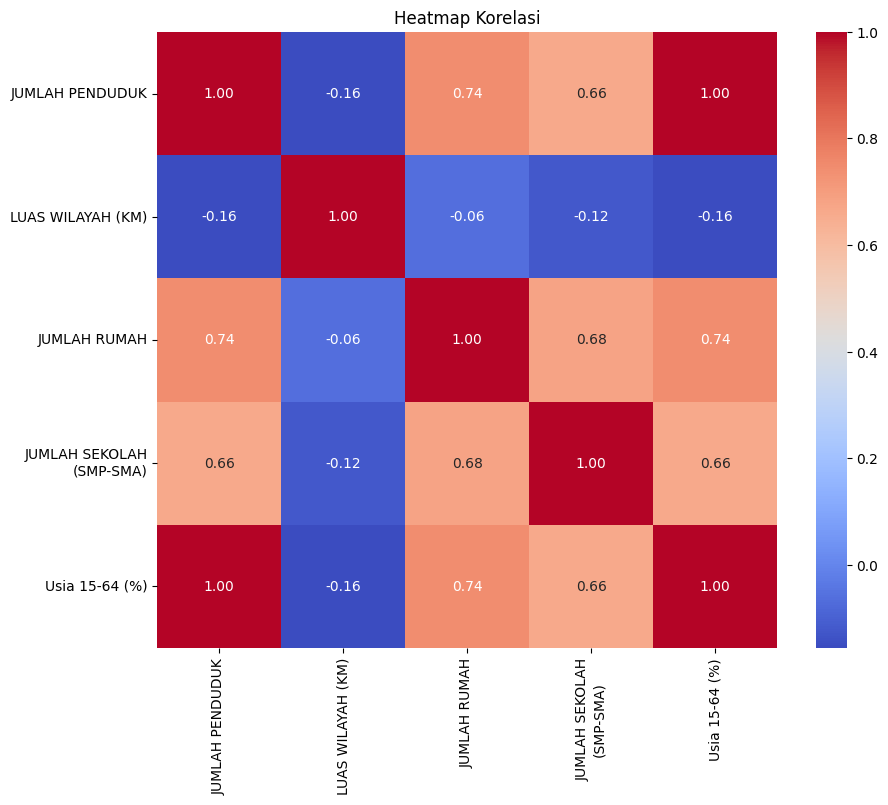

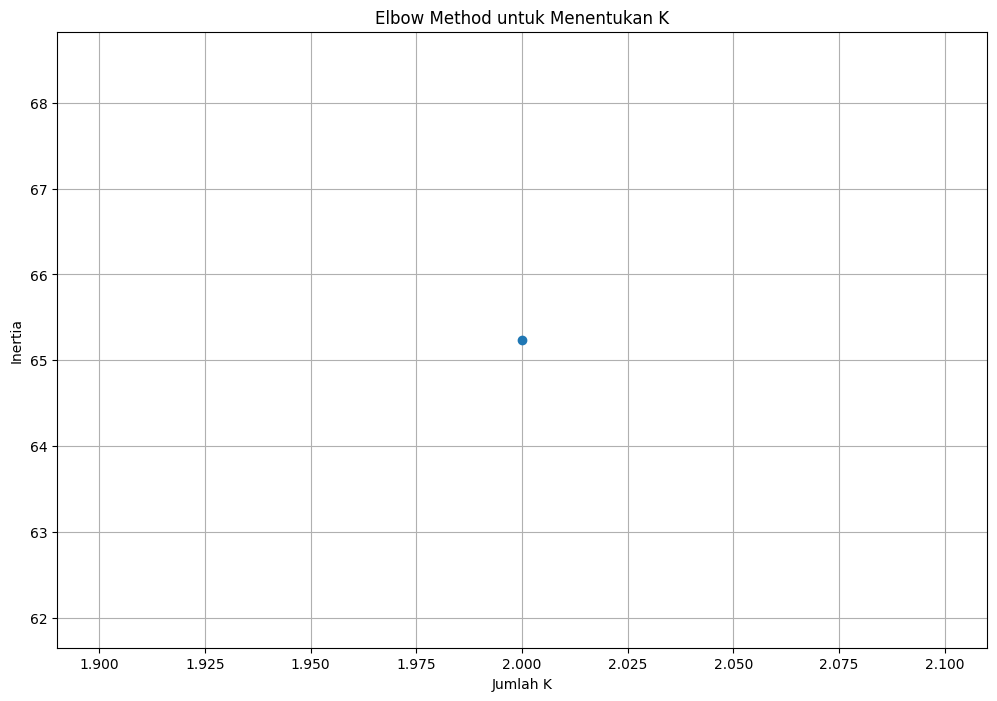

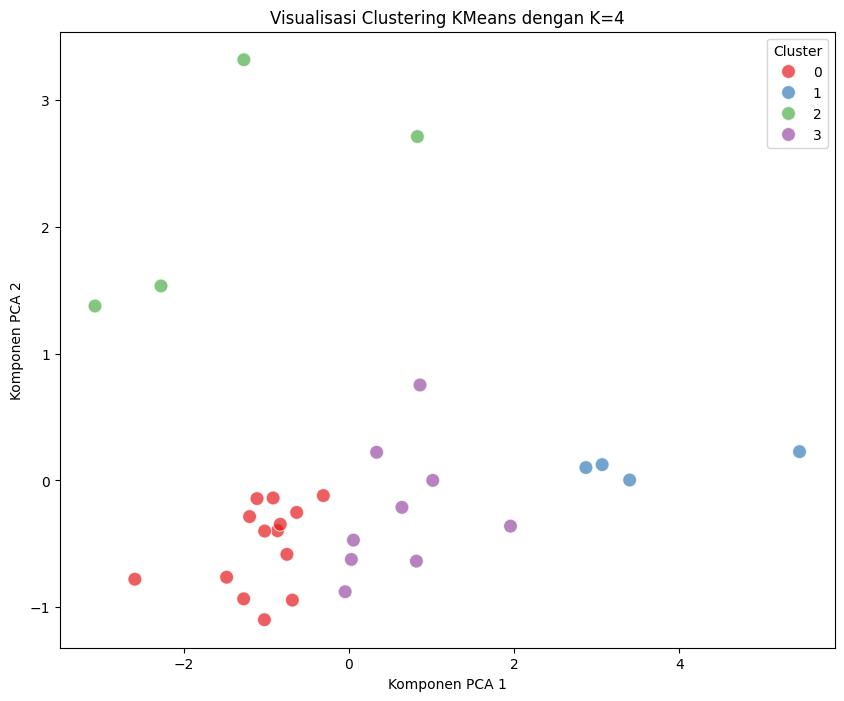

In [19]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Membaca dataset
file_path = '/content/drive/My Drive/DatasetBPSSelected.xlsx'
data = pd.read_excel(file_path, index_col=None)

# Menghapus kolom yang tidak diinginkan (Unnamed)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
# Menampilkan 5 data teratas
print(data.head())

# Target column
target_column = 'TEMBOK'  # Ganti dengan nama kolom target Anda

# --- Menghapus baris dengan nilai NaN ---
data.dropna(inplace=True)

# Data Transformation
# Menghapus NA dan memilih kolom numerik untuk analisis
data.fillna(method='ffill', inplace=True)  # Mengisi nilai NA dengan metode forward fill

# **Convert target column to string if it contains numerical categorical data**
data[target_column] = data[target_column].astype(str)

# EDA (Univariate Analysis)
plt.figure(figsize=(15, 5))

# Analisis 1: Distribusi dari kolom target
plt.subplot(1, 3, 1)
sns.histplot(data[target_column], bins=30, kde=True)
plt.title(f'Distribusi {target_column}')

# Analisis 2: Boxplot dari kolom numerik pertama
plt.subplot(1, 3, 2)
sns.boxplot(x=data[target_column])  # Ganti dengan kolom numerik yang relevan
plt.title('Boxplot kolom_numerik_1')

# Analisis 3: Frekuensi kolom kategorikal
plt.subplot(1, 3, 3)
data[target_column].value_counts().plot(kind='bar')  # Ganti dengan kolom kategorikal yang relevan
plt.title('Frekuensi kolom_kategorikal')

plt.tight_layout()
plt.show()

# EDA (Multivariate Analysis)
plt.figure(figsize=(15, 5))

# Select only numerical features for pairplot
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Choose a subset of numerical features for visualization if there are too many
selected_features = numerical_features[:4]  # Select the first 4 numerical features, for example

# Analisis 2: Pairplot dari beberapa kolom numerik
sns.pairplot(data[selected_features])  # Use the selected numerical features
plt.title('Pairplot dari kolom-kolom numerik')
plt.show()

# Analisis 3: Heatmap dari korelasi
plt.figure(figsize=(10, 8))

# **Replace '-' with NaN before calculating correlation**
data_numeric = data.select_dtypes(include=[np.number]).replace('-', np.nan)
correlation_matrix = data_numeric.corr()  # Calculate correlation on numerical data only

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# Reduksi Dimensi menggunakan PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))  # Hanya kolom numerik
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# KMeans Clustering
k_values = [2]  # Ubah k sesuai kebutuhan
inertia = []

plt.figure(figsize=(12, 8))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Menampilkan Elbow method
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method untuk Menentukan K')
plt.xlabel('Jumlah K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Memilih K dan melakukan clustering
optimal_k = 4  # Ganti dengan nilai K yang diinginkan
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_pca)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title(f'Visualisasi Clustering KMeans dengan K={optimal_k}')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   JUMLAH PENDUDUK  LUAS WILAYAH (KM)  JUMLAH RUMAH      TEMBOK  \
0              NaN                NaN           NaN         NaN   
1          89863.0             48.466       20892.0  16914.1632   
2          51589.0            148.370       10887.0   8814.1152   
3          93775.0            239.580       25805.0  20891.7280   
4          89418.0             55.000       22143.0  17926.9728   

   JUMLAH SEKOLAH\n(SMP-SMA) JUMLAH RS  Usia 15-64 (%) Kompetitor  
0                        NaN       NaN             NaN   Indihome  
1                       24.0         -       61466.292        ada  
2                       12.0         -       35286.876        ada  
3                       25.0         -       64142.100        ada  
4                       26.0         1       61161.912        ada  


<ipython-input-21-59c3a6e20619>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Mengisi nilai NA dengan metode forward fill


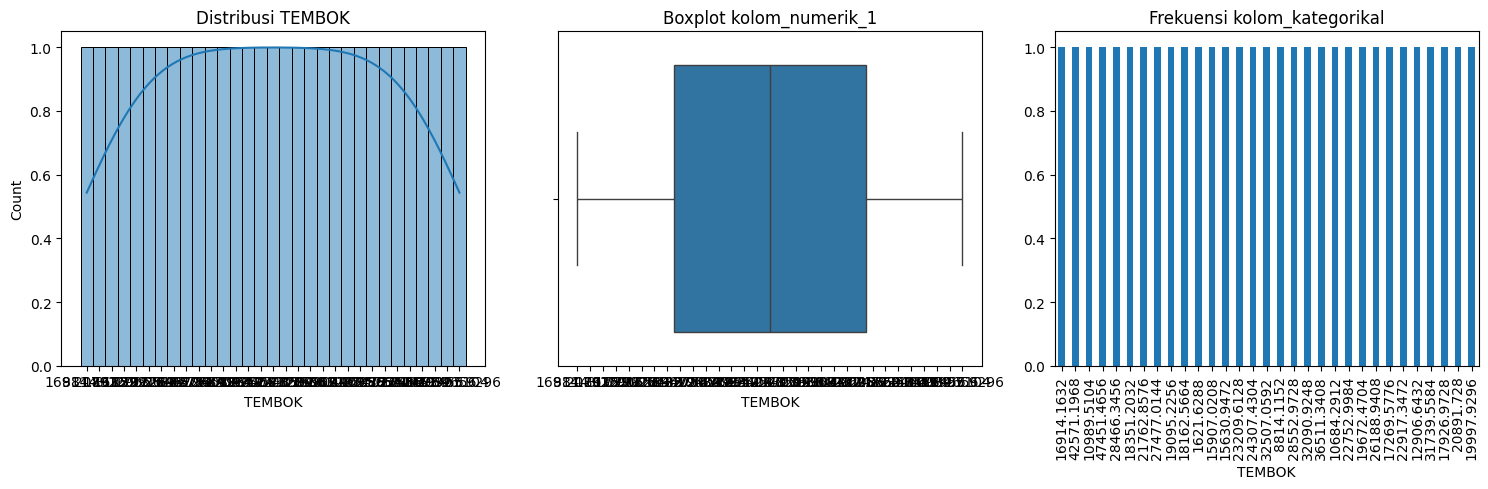

<Figure size 1500x500 with 0 Axes>

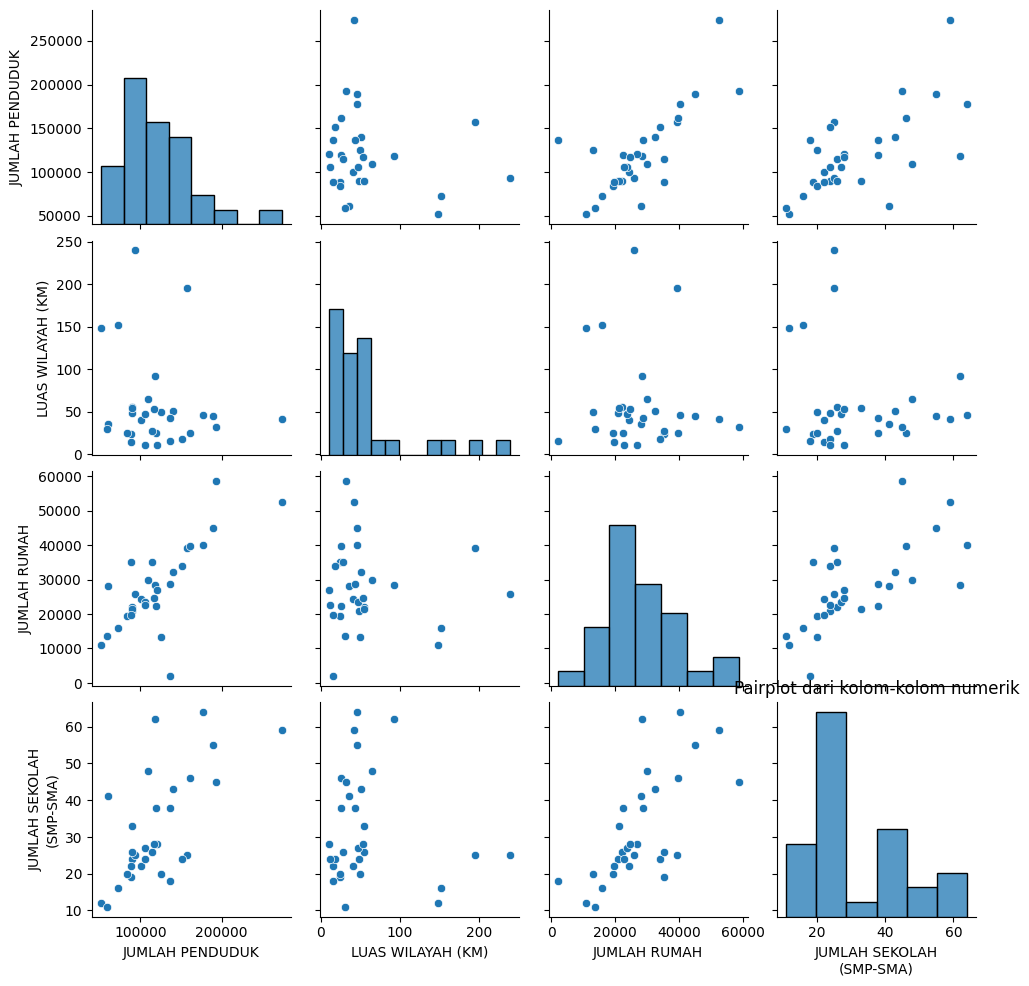

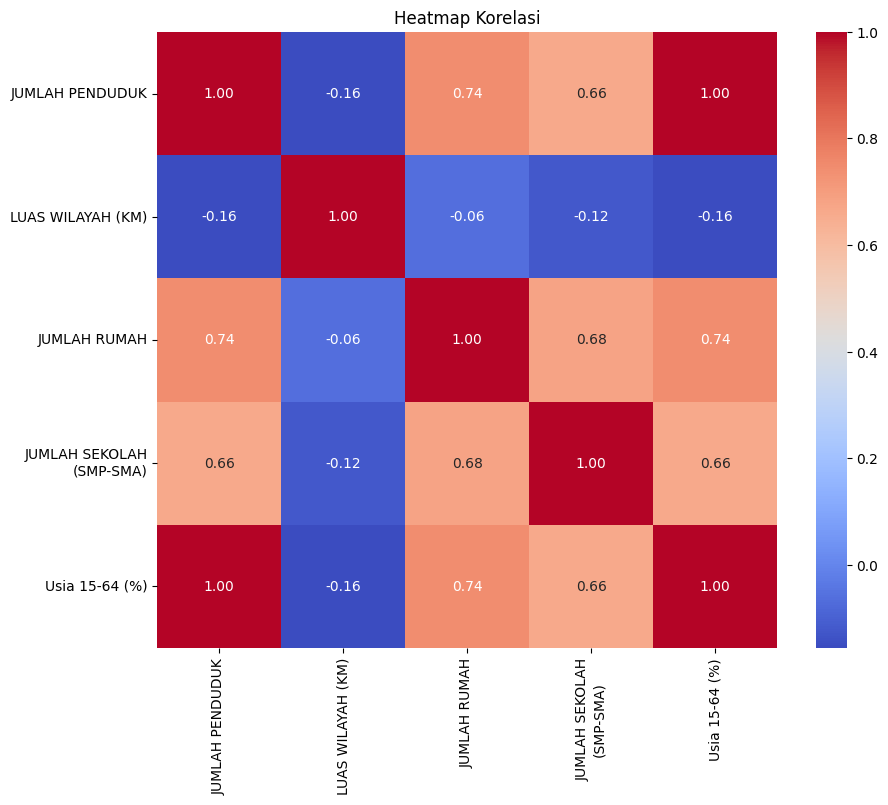

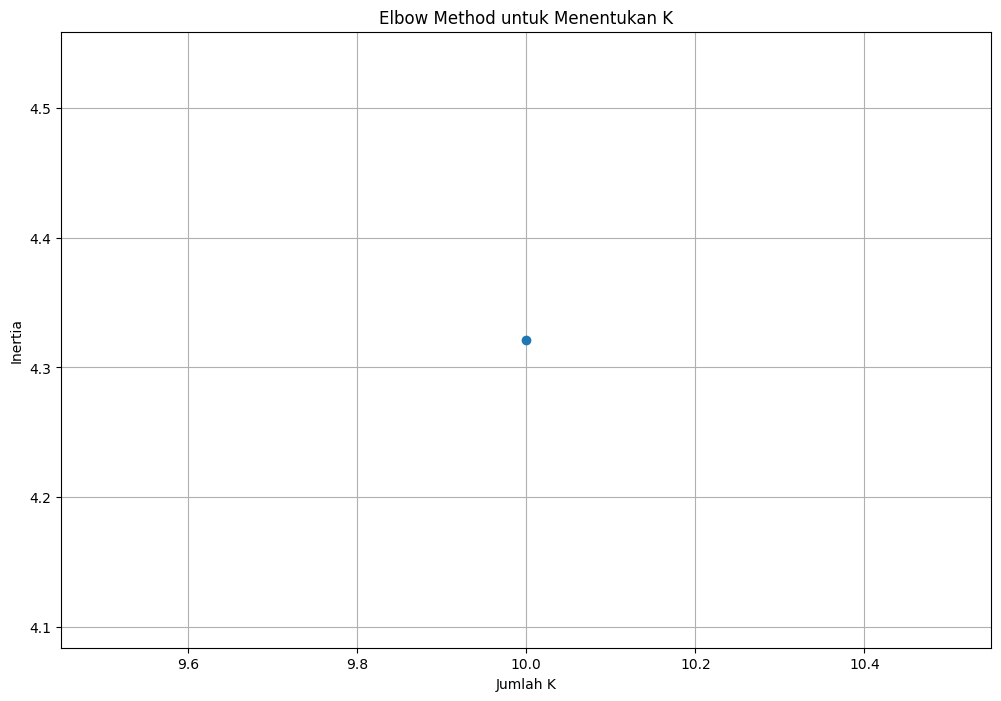

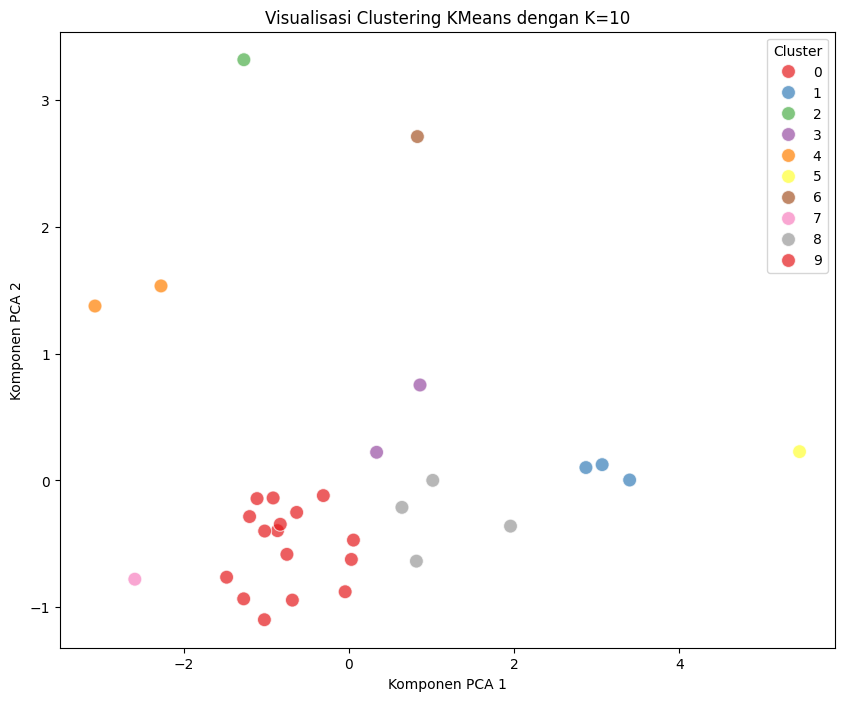

In [21]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Membaca dataset
file_path = '/content/drive/My Drive/DatasetBPSSelected.xlsx'
data = pd.read_excel(file_path, index_col=None)

# Menghapus kolom yang tidak diinginkan (Unnamed)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
# Menampilkan 5 data teratas
print(data.head())

# Target column
target_column = 'TEMBOK'  # Ganti dengan nama kolom target Anda

# --- Menghapus baris dengan nilai NaN ---
data.dropna(inplace=True)

# Data Transformation
# Menghapus NA dan memilih kolom numerik untuk analisis
data.fillna(method='ffill', inplace=True)  # Mengisi nilai NA dengan metode forward fill

# **Convert target column to string if it contains numerical categorical data**
data[target_column] = data[target_column].astype(str)

# EDA (Univariate Analysis)
plt.figure(figsize=(15, 5))

# Analisis 1: Distribusi dari kolom target
plt.subplot(1, 3, 1)
sns.histplot(data[target_column], bins=30, kde=True)
plt.title(f'Distribusi {target_column}')

# Analisis 2: Boxplot dari kolom numerik pertama
plt.subplot(1, 3, 2)
sns.boxplot(x=data[target_column])  # Ganti dengan kolom numerik yang relevan
plt.title('Boxplot kolom_numerik_1')

# Analisis 3: Frekuensi kolom kategorikal
plt.subplot(1, 3, 3)
data[target_column].value_counts().plot(kind='bar')  # Ganti dengan kolom kategorikal yang relevan
plt.title('Frekuensi kolom_kategorikal')

plt.tight_layout()
plt.show()

# EDA (Multivariate Analysis)
plt.figure(figsize=(15, 5))

# Select only numerical features for pairplot
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Choose a subset of numerical features for visualization if there are too many
selected_features = numerical_features[:4]  # Select the first 4 numerical features, for example

# Analisis 2: Pairplot dari beberapa kolom numerik
sns.pairplot(data[selected_features])  # Use the selected numerical features
plt.title('Pairplot dari kolom-kolom numerik')
plt.show()

# Analisis 3: Heatmap dari korelasi
plt.figure(figsize=(10, 8))

# **Replace '-' with NaN before calculating correlation**
data_numeric = data.select_dtypes(include=[np.number]).replace('-', np.nan)
correlation_matrix = data_numeric.corr()  # Calculate correlation on numerical data only

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# Reduksi Dimensi menggunakan PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))  # Hanya kolom numerik
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# KMeans Clustering
k_values = [10]  # Ubah k sesuai kebutuhan
inertia = []

plt.figure(figsize=(12, 8))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Menampilkan Elbow method
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method untuk Menentukan K')
plt.xlabel('Jumlah K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Memilih K dan melakukan clustering
optimal_k = 10  # Ganti dengan nilai K yang diinginkan
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_pca)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title(f'Visualisasi Clustering KMeans dengan K={optimal_k}')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster')
plt.show()
